In [45]:
#khai báo thư viện
from scipy import signal
import numpy as np
import matplotlib.pylab as plt
import pylab as pyl
from pylab import figure , plot , axes 
from scipy import signal
import matplotlib.pyplot as plt 

from matplotlib.patches import Rectangle
from scipy import signal
from pylab import *
from numpy import *



In [46]:
from scipy.signal import freqz,lfilter,firwin,kaiserord

def plot_freqz(b):
    grid(True)
    w,h = signal.freqz(b)
    h_dB = 20 * log10 (abs(h))
    plot(w/pi, h_dB)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Amplitude response')
    

def plot_phasez(b):
    grid(True)
    w,h = signal.freqz(b)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/pi, h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    
def plot_impz(b):
    grid(True)
    plot(b, 'bo-', linewidth=2)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    

def plot_filterz(b):
    
    
    plt.figure(1)
    plot_impz(b)
    plt.figure(2)
    plot_freqz(b)
    plt.figure(3)
    plot_phasez(b)


In [47]:
#khai báo các thông số mẫu tín hiệu
N=100
Ns = np.arange(0,N)
fs = 8e3
fc = 0.5e3
fpb = 0.5e3
Apb=1
Asb=60
f1=1e3
f2=3e3
#
t = np.arange(N)/fs
x = 5*np.sin(2*np.pi*f1*t)+10*np.sin(2*np.pi*f2*t); # tại  2 tần số f1 f2

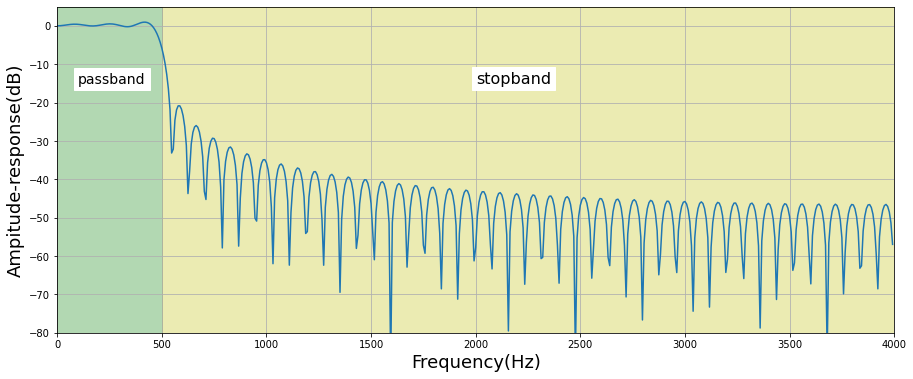

In [48]:
#cửa sổ chữ nhật

hn1= signal.firwin(N,fc,window='boxcar',pass_zero='lowpass',fs=fs)
#đáp ứng tần số
w1,h1 = signal.freqz(hn1)
W1 = w1/np.pi*fs/2
#đáp ứng biên độ
H1= 20*np.log10(np.abs(h1))
#pha
Phase = pyl.angle(h1,deg= True);
#phổ tín hiệu
X1 = np.fft.fft(x)
y1= signal.lfilter(hn1,1,X1)
Y1= np.fft.fft(y1)
fig,ax = plt.subplots(sharex=True)
fig.set_size_inches((15,6))
ax.plot(W1,H1)
ymax,ymin = 5,-80
xmax,xmin = 4000,0
ax.axes.axis(ymin = ymin,ymax=ymax)
ax.axes.axis(xmin = xmin,xmax=xmax)
ax.set_xlabel('Frequency(Hz)',fontsize= 18)
ax.set_ylabel('Ampitude-response(dB)',fontsize= 18)
ax.add_patch(pyl.Rectangle((0,ymin),width=fpb,height=ymax-ymin,color='g',alpha= 0.3))
ax.add_patch(pyl.Rectangle((fpb,ymin),width=fs-fpb,height=ymax-ymin,color='y',alpha=0.3))
ax.text(100,-15,'passband',fontsize=14,bbox=dict(color='w',))
ax.text(2000,-15,'stopband',fontsize=16,bbox=dict(color='w'))
ax.grid()

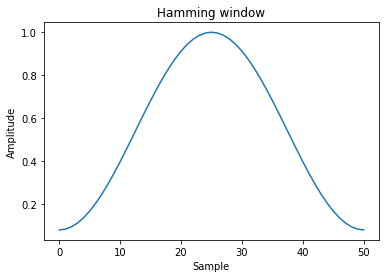

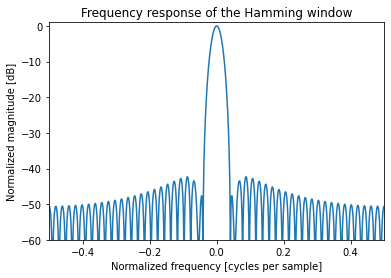

In [49]:
#cửa sổ hamming
from scipy.fft import fft, fftshift
window = signal.windows.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()

A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -60, 1])
plt.title("Frequency response of the Hamming window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

plt.show()



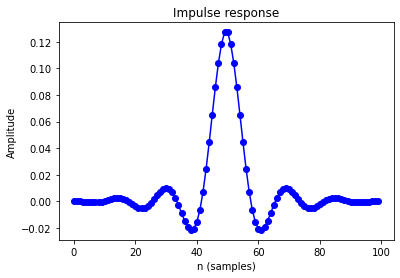

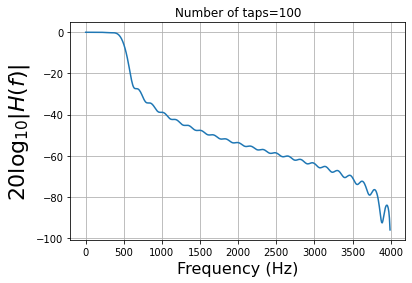

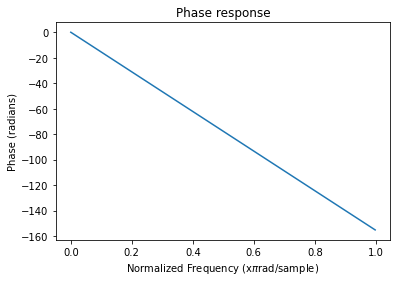

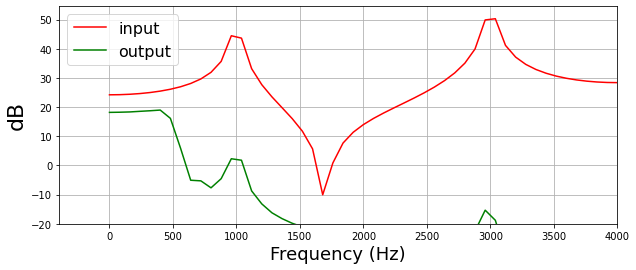

In [50]:
#cửa sổ tam giác
from numpy import fft
hn2 = signal.firwin(N,fc,window="bartlett",nyq=fs/2.,pass_zero='lowpass')

# đáp ứng tần số
w2,H2 = signal.freqz(hn2) # frequency response



fig,ax = plt.subplots()
ax.plot(hn2, 'bo-')
ax.set_ylabel('Amplitude')
ax.set_xlabel(r'n (samples)')
ax.set_title(r'Impulse response')


fig,ax = plt.subplots()
ax.plot(w/np.pi*fs/2.,20*np.log10(abs(H2))) #vẽ đáp ứng biên độ
ax.set_xlabel("Frequency (Hz)",fontsize=16)
ax.set_ylabel(r"$20\log_{10} |H(f)| $",fontsize=22)
ax.set_title("Number of taps=%d"%N)
ax.grid()


fig,ax = plt.subplots()
h_Phase = np.unwrap(np.arctan2(np.imag(H2),np.real(H2)))
ax.plot(w2/np.pi, h_Phase)
ax.set_ylabel('Phase (radians)')
ax.set_xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
ax.set_title(r'Phase response')





X2 = fft.fft(x,N)
y2=signal.lfilter(hn2,1,x)
Y2 = fft.fft(y2,N)

fig,ax = plt.subplots()
fig.set_size_inches((10,4))
ax.plot(np.arange(N)/N*fs,20*np.log10(abs(X2)),'r-',label='input')
ax.plot(np.arange(N)/N*fs,20*np.log10(abs(Y2)),'g-',label='output')
ax.set_xlim(xmax = fs/2)
ax.set_ylim(ymin=-20)
ax.set_ylabel(r'dB',fontsize=22)
ax.set_xlabel("Frequency (Hz)",fontsize=18)
ax.grid()
ax.legend(loc=0,fontsize=16);

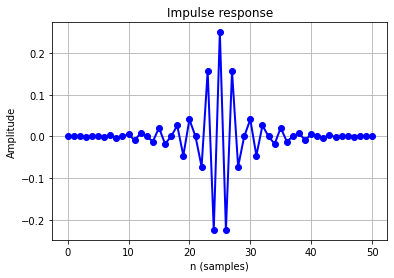

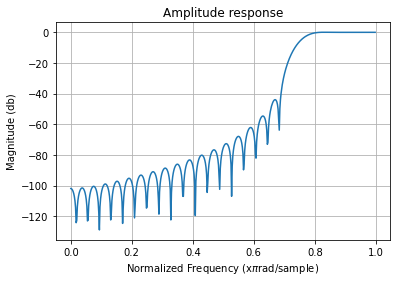

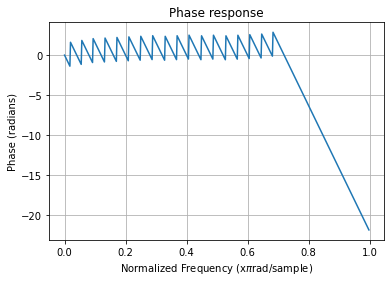

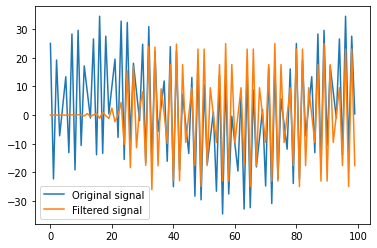

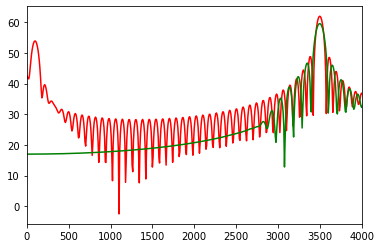

In [51]:
# cửa sổ hanning 

if __name__ == "__main__":

    Ns =100 # number of sample
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 8000
    nyq = fs / 2
    T  = 1/fs
    t  = arange(0,Ns)/fs
    cutoff = 3000
    #Design filter 
    M = 51
    b = signal.firwin(M, cutoff = cutoff / nyq, window = "hanning",pass_zero=False)

    #Plot properties
    plot_filterz(b)
    F_low  = 100 
    F_high = 3500  
    x = 10 * np.sin(2*np.pi*F_low*t) + 25 * np.cos(2*np.pi*F_high*t)
    # "Noisy" data.  We want to recover the 1.2 Hz signal from this.
    y = signal.lfilter(b, 1,  x)
    
    figure()
    plot(x, label = "Original signal")
    plot(y, label = "Filtered signal")
    legend()
    N = 1024 # DFT size
    X = np.fft.fft(x,N)
    Y = np.fft.fft(y,N)
    figure()
    xlim(xmax = fs/2)
    plot(arange(N)/N*fs,20*log10(abs(X)),'r-',label='filter input')
    plot(arange(N)/N*fs,20*log10(abs(Y)),'g-',label='filter output')    